# Machine Learning para a predição de diabetes

A diabetes é uma doença crônica caracterizada pelo aumento dos níveis de açúcar no sangue, o que pode provocar danos em vários órgãos do corpo, em 2016, a organização mundial da saúda(oms) classificou diabetes como uma epidemia global.Este tabalho utiliza o data set fornecido pelo  National Institute of Diabetes and Digestive and Kidney Diseases através do link:

https://www.kaggle.com/datasets/mathchi/diabetes-data-set

O objetivo é desenvolver, através de machine learning, um modelo de predição de diabetes baseado nos dados fornecidos.

#### Primeiramente, vamos baixar as bibliotecas utilizadas.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from numpy import genfromtxt
from scipy.stats import zscore
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from plotly import graph_objects as go
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold, cross_val_score


#### Podemos então acessar o dataset fornecido.

Vamos chamar o dataset de df_diabetes

In [2]:
df_diabetes=pd.read_csv("diabetes.csv")

## Exploração do data set

In [3]:
df_diabetes.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Composição


O data set possui 9 colunas, cada uma representa uma determinada característica individual instrinscecamente ligada áo surgimento de diabetes que mais tarde serão usadas para projetar um modelo de detecção, Essas seriam:


- Pregnancies: (número de gravidez)
- Glucose: (concentração de glicose no sangue)
- BloodPreassuree:(Pressão arterial em mm Hg)
- SkinThickness: ( grossura da pele em mm)
- Insulin: ( nível de insulina no sangue em mu U/ml)
- BMI: (índice de massa corporal)
- DiabetesPedigreeFunction: ( Função de pedigree de diabetes)
- Age: (idade em anos) 
- Outcome: (Diagnóstico, 0 negativo e 1 positivo)

### Análise das colunas

Utilizando a função .info(), podemos analisar o formato de cada coluna, e podemos ver que são todos em formato de números inteiros.


In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Outliers

Outliers são valores que estão muito fora do padrão na distribuição, a presença deles pode ser um problema para os modelos, portanto é bom diminui-los ou até elimina-los

Para detectar os outliers de forma prática, podemos plotar as colunas em 'box-plot' os outliers aparecem na forma de pontos fora da caixa:


<AxesSubplot:>

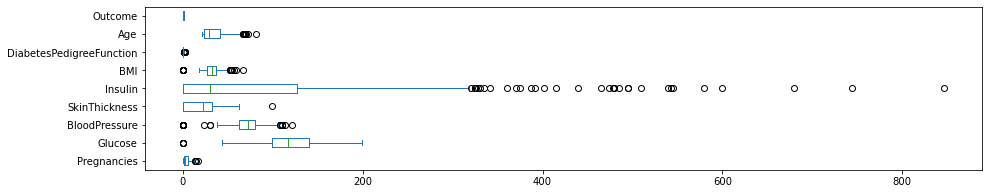

In [8]:
df_diabetes.plot(kind='box', vert=False, figsize=(15, 3))

Para remover ou diminuir os outliers, usamos o método IQR:

In [13]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'] 
Q1 = df_diabetes[cols].quantile(0.25)
Q3 = df_diabetes[cols].quantile(0.75)
IQR = Q3 - Q1

df = df_diabetes[~((df_diabetes[cols] < (Q1 - 1.5 * IQR)) |(df_diabetes[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:>

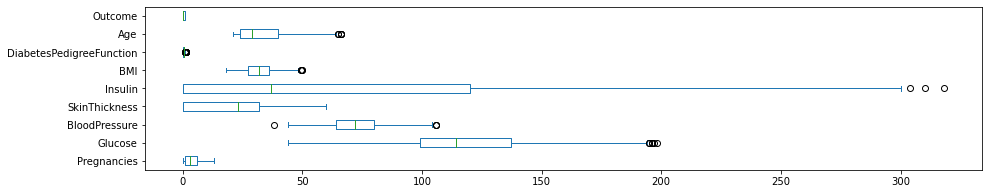

In [15]:
df.plot(kind='box', vert=False, figsize=(15, 3))

In [ ]:
df.shape

In [ ]:
df.isnull().count()

## Exploração de dados.

Podemos então usar a biblioteca seaborn para visualizar alguns aspectos do dataset


In [ ]:
plt.figure(figsize=(15,6))
sns.pairplot(df,hue = 'Outcome')

### Distribuição das idades.

Utilizando a função countplot, podemos ter uma ideia da distribuição das idades de cada paciente, como podemos ver, a grande maioria se encontra entre 21 e 30 anos.Com menos pacientes nas faixas etárias mais avançadas.

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.Age)


### Distribuição do IMC.

Utilizando a função displot, podemos ver que a distribuição do IMC é em torno de 30, segundo a OMS, o IMC de uma pessoa normal varia  entre 18,5 e 24,9, podemos supor que a massa é um dos fatores mais recorrentes para o surgimento da doença.


In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=df.BMI,color='blue')

### Análise da Glicose

Dado que a glicose é um dos fatores mais claros da  detecção de  diabetes, podemos usar a função scatterplot e analisar, que quanto maior a glicose, maior a insulina, e utilizando Hue=Outcome como entrada, podemos então ver que tbm aumenta o número de casos positivados da doença.

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

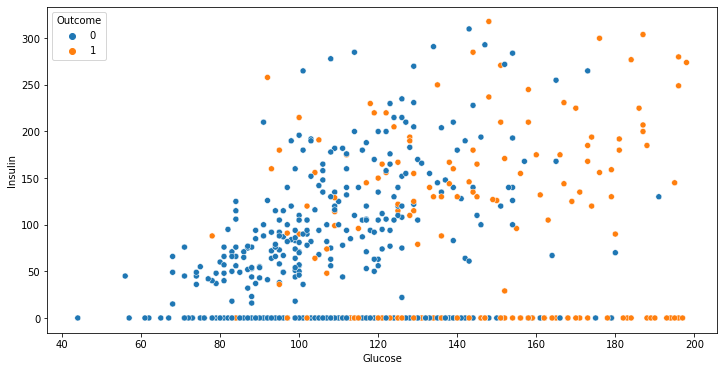

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df.Glucose,y=df.Insulin,hue=df.Outcome)

<AxesSubplot:>

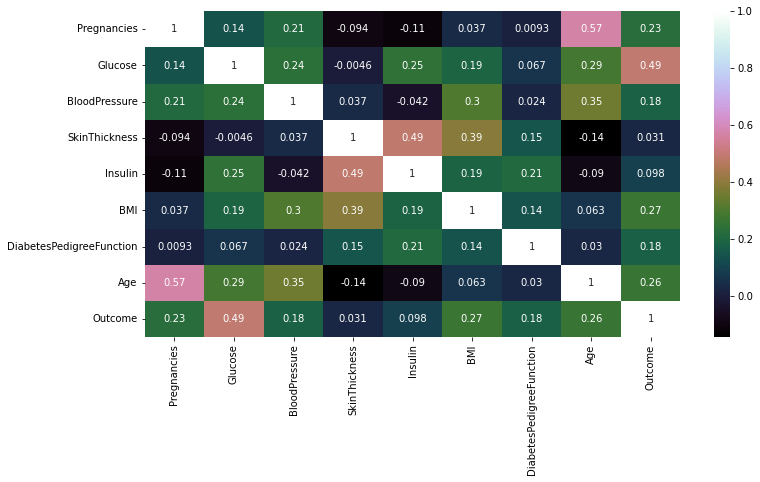

In [18]:
plt.figure(figsize=(12,6))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='cubehelix')

## Aprendizado da máquina

Vamos então testar os seguintes classificadores:

- NavierBayes gaussian()
- KNeighborsClassifier()
- DecisionTreeClassifier()
- LogisticRegression()

Para avaliar o desempenho de cada modelo, usamos a função classification_report,esta que devolve todas as métricas de avaliação do modelo para que assim possamos descobrir aquele com maior precisão para a prever da acometimento da doença.

Para criar cada modelo, precisamos dividir o dataset entre test e train, isso porque uma parte vai ser usada para "treinar" o algoritimo, e a outra para "testar".Para isso, usamos a função:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Sendo Test_size a porcentagem da divisão, no caso 20% para treinar e 70% para testar, e o random_state um estado randômico para iniciar a função.

### NavierBayes gaussian()

In [20]:
X=df.drop('Outcome', axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
regr_1 = GaussianNB()
regr_1.fit(X_train, y_train)
y_pred=regr_1.predict(X_test)

regr_1.score(X_test, y_test)
print("Acurácia do modelo: ",regr_1.score(X_test, y_test)*100,"%")

print(classification_report(y_test,y_pred))
pred = regr_1.predict(X_test)
cm_1=confusion_matrix(y_test,pred)


trueNegative=cm_1[0][0]
falsePossitive=cm_1[0][1]
false_negative=cm_1[1][0]
truePositive=cm_1[1][1]

print("verdadeiro negativo:", trueNegative)
print("Falso Positivo:", falsePossitive)
print("falso negativo:", false_negative)
print("verdadeiro positivo:", truePositive)




Acurácia do modelo:  75.0 %
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        83
           1       0.65      0.62      0.64        45

    accuracy                           0.75       128
   macro avg       0.73      0.72      0.72       128
weighted avg       0.75      0.75      0.75       128

verdadeiro negativo: 68
Falso Positivo: 15
falso negativo: 17
verdadeiro positivo: 28


### KNeighborsClassifier()

In [23]:
X=df.drop('Outcome', axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

regr_2=KNeighborsClassifier(n_neighbors=50,p=2,metric='euclidean')
regr_2.fit(X_train, y_train)
y_pred=regr_2.predict(X_test)

regr_2.score(X_test, y_test)
print("Acurácia do modelo: ",regr_2.score(X_test, y_test)*100,"%")

print(classification_report(y_test,y_pred))
pred = regr_2.predict(X_test)
confusion_matrix(y_test,pred)
cm_2=confusion_matrix(y_test,pred)


trueNegative=cm_2[0][0]
falsePossitive=cm_2[0][1]
false_negative=cm_2[1][0]
truePositive=cm_2[1][1]

print("verdadeiro negativo:", trueNegative)
print("Falso Positivo:", falsePossitive)
print("falso negativo:", false_negative)
print("verdadeiro positivo:", truePositive)




Acurácia do modelo:  77.34375 %
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        83
           1       0.83      0.44      0.58        45

    accuracy                           0.77       128
   macro avg       0.80      0.70      0.71       128
weighted avg       0.79      0.77      0.75       128

verdadeiro negativo: 79
Falso Positivo: 4
falso negativo: 25
verdadeiro positivo: 20


### LogisticRegression()

In [29]:
X=df.drop('Outcome', axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

regr_3=LogisticRegression(solver='liblinear', max_iter=1000)
regr_3.fit(X_train, y_train)
y_pred=regr_3.predict(X_test)

regr_3.score(X_test, y_test)
print("Acurácia do modelo: ",regr_3.score(X_test, y_test)*100,"%")


print(classification_report(y_test,y_pred))
pred = regr_3.predict(X_test)
cm_3=confusion_matrix(y_test,pred)

trueNegative=cm_3[0][0]
falsePossitive=cm_3[0][1]
false_negative=cm_3[1][0]
truePositive=cm_3[1][1]

print("verdadeiro negativo:", trueNegative)
print("Falso Positivo:", falsePossitive)
print("falso negativo:", false_negative)
print("verdadeiro positivo:", truePositive)





Acurácia do modelo:  75.78125 %
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        83
           1       0.73      0.49      0.59        45

    accuracy                           0.76       128
   macro avg       0.75      0.70      0.71       128
weighted avg       0.75      0.76      0.74       128

verdadeiro negativo: 75
Falso Positivo: 8
falso negativo: 23
verdadeiro positivo: 22


###  DecisionTreeClassifier()

In [24]:
X=df.drop('Outcome', axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

regr_4=DecisionTreeClassifier(max_depth=2,random_state = 0,criterion='entropy')
regr_4.fit(X_train, y_train)
y_pred=regr_4.predict(X_test)

regr_4.score(X_test, y_test)
print("Acurácia do modelo: ",regr_4.score(X_test, y_test)*100,"%")


print(classification_report(y_test,y_pred))
pred = regr_4.predict(X_test)

cm_4=confusion_matrix(y_test,pred)
trueNegative=cm_4[0][0]
falsePossitive=cm_4[0][1]
false_negative=cm_4[1][0]
truePositive=cm_4[1][1]

print("verdadeiro negativo:", trueNegative)
print("Falso Positivo:", falsePossitive)
print("falso negativo:", false_negative)
print("verdadeiro positivo:", truePositive)



Acurácia do modelo:  75.78125 %
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        83
           1       0.82      0.40      0.54        45

    accuracy                           0.76       128
   macro avg       0.78      0.68      0.69       128
weighted avg       0.77      0.76      0.73       128

verdadeiro negativo: 79
Falso Positivo: 4
falso negativo: 27
verdadeiro positivo: 18


### Validação Cruzada

O método de validação cruzada a ser utilizado é denominado "k-fold" , estconsiste em dividir o conjunto total de dados em k subconjuntos mutuamente exclusivos do mesmo tamanho e, a partir daí, um subconjunto é utilizado para teste e os k-1 restantes são utilizados para estimação dos parâmetros, fazendo-se o cálculo da acurácia do modelo. Este processo é realizado k vezes alternando de forma circular o subconjunto de teste. A figura abaixo mostra o esquema realizado pelo k-fold.

In [27]:


cv_1 = KFold(n_splits=10, random_state=1, shuffle=True)
scores_1 = cross_val_score(regr_1, X, y, scoring='accuracy', cv=cv_1, n_jobs=-1)

cv_2 = KFold(n_splits=10, random_state=1, shuffle=True)
scores_2 = cross_val_score(regr_2, X, y, scoring='accuracy', cv=cv_2, n_jobs=-1)

cv_3 = KFold(n_splits=10, random_state=1, shuffle=True)
scores_3 = cross_val_score(regr_3, X, y, scoring='accuracy', cv=cv_3, n_jobs=-1)

cv_4 = KFold(n_splits=10, random_state=1, shuffle=True)
scores_4 = cross_val_score(regr_4, X, y, scoring='accuracy', cv=cv_4, n_jobs=-1)

In [28]:
for i in (scores_1,scores_2,scores_3,scores_4):
 print("score",i,'\n')

score [0.796875   0.78125    0.8125     0.71875    0.75       0.765625
 0.71875    0.78125    0.703125   0.76190476] 

score [0.796875   0.8125     0.765625   0.734375   0.8125     0.734375
 0.796875   0.71875    0.734375   0.76190476] 

score [0.765625   0.765625   0.8125     0.765625   0.828125   0.8125
 0.75       0.71875    0.765625   0.80952381] 

score [0.765625   0.734375   0.796875   0.703125   0.796875   0.71875
 0.765625   0.640625   0.71875    0.82539683] 



# Conclusão
Baseado nos resultados obtidos, podemos então avaliar que é o que KNeighborsClassifier() possui o melhor desempenho dos modelos testados